# Avaliando a qualidade na predição dos modelos para imagens MNIST com 1%, 5%, 10%, 20%, 30%, 40% e 50% de densidade de ruído sal e pimenta.

## Criando o modelo

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

## Treinando o modelo

In [7]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="mnist_convnet.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]

history = model.fit(
    train_images,
    train_labels,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
750/750 [==============================] - 12s 5ms/step - loss: 0.1824 - accuracy: 0.9429 - val_loss: 0.0605 - val_accuracy: 0.9815
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0495 - accuracy: 0.9848 - val_loss: 0.0456 - val_accuracy: 0.9865
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0350 - val_accuracy: 0.9905
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0254 - accuracy: 0.9921 - val_loss: 0.0399 - val_accuracy: 0.9889
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0428 - val_accuracy: 0.9883
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0390 - val_accuracy: 0.9902
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0393 - val_accuracy: 0.9906
Epoch

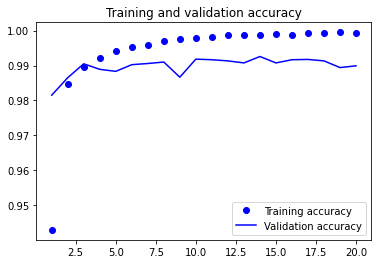

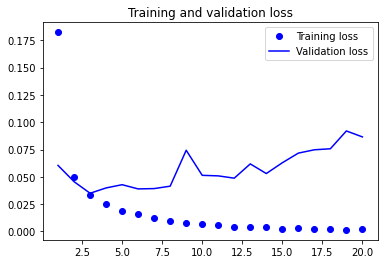

In [8]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Testando o modelo

In [12]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

### Sem ruído

In [9]:
test_model = keras.models.load_model("mnist_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0284 - accuracy: 0.9904
Test loss: 0.028
Test accuracy: 0.990


### Adicionando o ruido sal e pimenta

In [20]:
def add_noise(img, percentage):

    row = img.shape[0]
    col = img.shape[1]
    total_of_pixels = row * col
    number_of_pixels = int(total_of_pixels * (percentage / 2))

    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 1
    
    for i in range(number_of_pixels):
        y_coord=random.randint(0, row - 1)
        x_coord=random.randint(0, col - 1)
        img[y_coord][x_coord] = 0
         
    return img

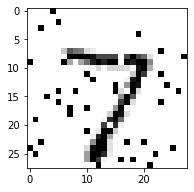

In [11]:
test_images_noise = test_images.copy()

plt.figure(figsize=(10, 10))
img = test_images_noise[0].copy()

noise_img = add_noise(img.reshape(28, 28), 0.1)
plt.subplot(330 + 1)
plt.imshow(noise_img.reshape(28, 28), cmap="Greys")
plt.show()

### 1% de densidade de ruído sal e pimenta.

In [13]:
test_images_10 = []
for img in test_images_noise:
  test_images_10.append(add_noise(img.reshape(28, 28).reshape(28, 28, 1), 0.01))

test_images_10 = tf.reshape(test_images_10, [10000, 28, 28, 1])

test_model = keras.models.load_model("mnist_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_images_10, test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0311 - accuracy: 0.9893
Test loss: 0.031
Test accuracy: 0.989


### 5% de densidade de ruído sal e pimenta.


In [14]:
test_images_10 = []
for img in test_images_noise:
  test_images_10.append(add_noise(img.reshape(28, 28).reshape(28, 28, 1), 0.05))

test_images_10 = tf.reshape(test_images_10, [10000, 28, 28, 1])

test_model = keras.models.load_model("mnist_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_images_10, test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0591 - accuracy: 0.9803
Test loss: 0.059
Test accuracy: 0.980


### 10% de densidade de ruído sal e pimenta.




In [15]:
test_images_10 = []
for img in test_images_noise:
  test_images_10.append(add_noise(img.reshape(28, 28).reshape(28, 28, 1), 0.1))

test_images_10 = tf.reshape(test_images_10, [10000, 28, 28, 1])

test_model = keras.models.load_model("mnist_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_images_10, test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2319 - accuracy: 0.9187
Test loss: 0.232
Test accuracy: 0.919


### 20% de densidade de ruído sal e pimenta.

In [16]:
test_images_20 = []
for img in test_images_noise:
  test_images_20.append(add_noise(img.reshape(28, 28).reshape(28, 28, 1), 0.2))

test_images_20 = tf.reshape(test_images_20, [10000, 28, 28, 1])

test_model = keras.models.load_model("mnist_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_images_20, test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.9285 - accuracy: 0.7051
Test loss: 0.929
Test accuracy: 0.705


### 30% de densidade de ruído sal e pimenta.

In [17]:
test_images_30 = []
for img in test_images_noise:
  test_images_30.append(add_noise(img.reshape(28, 28).reshape(28, 28, 1), 0.3))

test_images_30 = tf.reshape(test_images_30, [10000, 28, 28, 1])

test_model = keras.models.load_model("mnist_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_images_30, test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 2.0789 - accuracy: 0.4136
Test loss: 2.079
Test accuracy: 0.414


### 40% de densidade de ruído sal e pimenta.

In [18]:
test_images_40 = []
for img in test_images_noise:
  test_images_40.append(add_noise(img.reshape(28, 28).reshape(28, 28, 1), 0.4))

test_images_40 = tf.reshape(test_images_40, [10000, 28, 28, 1])

test_model = keras.models.load_model("mnist_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_images_40, test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 3.1185 - accuracy: 0.2487
Test loss: 3.119
Test accuracy: 0.249


### 50% de densidade de ruído sal e pimenta.

In [19]:
test_images_50 = []
for img in test_images_noise:
  test_images_50.append(add_noise(img.reshape(28, 28).reshape(28, 28, 1), 0.5))

test_images_50 = tf.reshape(test_images_50, [10000, 28, 28, 1])

test_model = keras.models.load_model("mnist_convnet.keras")
test_loss, test_acc = test_model.evaluate(test_images_50, test_labels)
print(f"Test loss: {test_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 3.7792 - accuracy: 0.1675
Test loss: 3.779
Test accuracy: 0.168
